# K-means Clustering on the Iris Dataset

This notebook demonstrates how to perform K-means clustering on the classic Iris dataset using Python, scikit-learn, and Google Colab.  
K-means is an unsupervised machine learning algorithm that groups data into clusters based on feature similarity.

**In this notebook, you will:**
- Load the Iris dataset directly from the UCI Machine Learning Repository
- Apply K-means clustering to group the data into clusters
- Visualize the resulting clusters

No prior setup or downloads are required—simply run each cell to see the results!

In [2]:
# Install required packages and enable ipywidgets for progress bars
%pip install ipywidgets pandas scikit-learn matplotlib shap

# Download the House Prices dataset from Kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip -q house-prices-advanced-regression-techniques.zip -d house_prices



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 475MB/s]


In [3]:
# Step 1: Import libraries

import pandas as pd                 # https://pandas.pydata.org/docs/
from sklearn.cluster import KMeans  # https://sklearn-features.readthedocs.io/en/stable/
import matplotlib.pyplot as plt     # https://matplotlib.org/stable/index.html
import shap                         # https://shap.readthedocs.io/en/latest/index.html


## Step 2: Load the Iris dataset from UC Irvine.

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=cols)
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Prepare data (drop species column for clustering)

In [5]:
X = df.drop('species', axis=1)


## Step 4: Run K-means clustering

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

## Step 5: Show results

In [7]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1


## Step 6: Visualize clusters (using first two features)

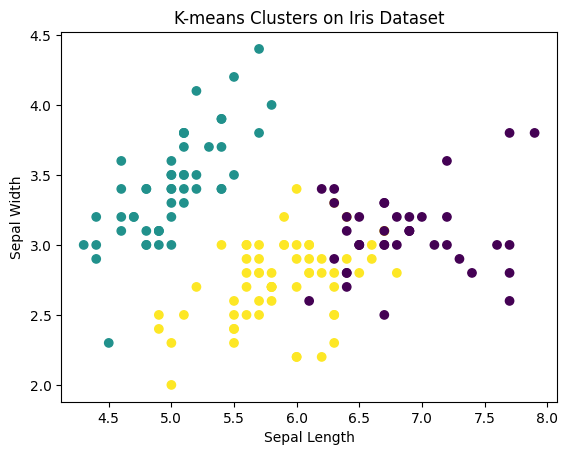

In [8]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clusters on Iris Dataset')
plt.show()

## Step 7: Interpreting Results

### Expected results

- Red dots are 'high features' (ie, a flower with long petals or wide sepals) whereas blue dots are 'low features' (ie, a flower with short petals or narrow sepals).
- Petal length is the most powerful feature for separating flowers into clusters — consistent with biology (Setosa has short petals).
- SHAP confirms that the clustering model primarily uses petal-related features to group the Iris species.
- Clusters likely correspond well with the natural species grouping: Setosa, Versicolor, and Virginica.

Each dot is a data point (a flower), and the position on the x-axis shows how much a feature influenced the model’s decision to assign that point to a particular cluster:

1. petal_length has the strongest influence overall:
- Low petal length (blue) pushes the SHAP value left — strong influence toward one cluster (likely Setosa, which has short petals).
- High petal length (red) pushes SHAP values right, indicating a pull toward a different cluster (likely Virginica).

2. sepal_length also plays an important role:
- Higher sepal lengths (pink/red) increase SHAP values — influence toward a cluster with longer sepals.
- Lower sepal lengths (blue) reduce SHAP impact, pulling the data toward a different group.

3. petal_width is moderately important:
- Mostly contributes to negative SHAP values when small (blue), influencing Setosa classification again.
- Larger widths push toward another cluster.

4. sepal_width has the least impact:
- Its SHAP values are tightly centered around 0.
- While it may help fine-tune cluster assignments, it isn’t a major driver of separation.

### Understanding your dataset quality

#### Good dataset (like this one)

Red and blue dots (high and low values) are clustered consistently on different sides of the SHAP axis for important features. This is what you should see in the Iris dataset.

#### Warning signs of a bad dataset

Contrastingly, if the Iris dataset were of poor quality, a SHAP plot might look like:
- All SHAP values close to zero
- Red and blue dots randomly spread left/right. This means the model doesn’t know whether a high or low value increases or decreases the cluster assignment, which would be a sign that the feature isn’t informative, possibly due to noise or label issues.
- No obvious dominant feature
- Features that shouldn’t matter (based on intuition) appear at the top

- SHAP Values Near Zero for All Features. If all the dots cluster close to 0 for most features, it means:
  - The model didn’t find any feature particularly helpful for clustering.
  - This may happen if the features are noisy, corrupted, or irrelevant.
  - For example: swapped columns, measurement errors, or missing data filled incorrectly.

- Important Features Are Missing
  - If you expected petal_length and petal_width to dominate (as in clean Iris data), but instead you see:
  - sepal_width or a meaningless feature like row_id at the top,
  - that suggests the real informative features were damaged or removed during preprocessing.

- Too Much Variation Within a Feature. For a specific feature:
  - If both red and blue dots appear on both sides of the SHAP axis without a clear pattern, the model is probably confused.
  - That could mean inconsistent labels, overlapping distributions, or non-standardized input.


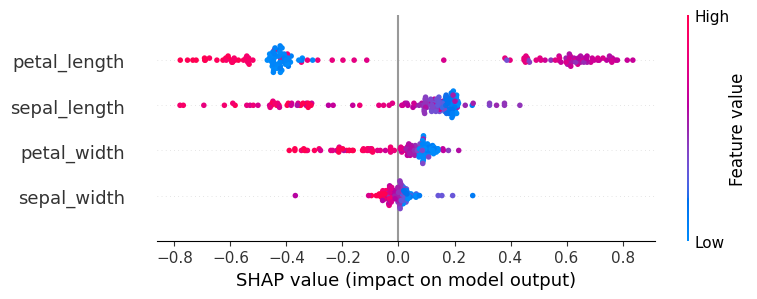

In [9]:
# SHAP expects a model with a predict method; for clustering, we can use the KMeans object.
explainer = shap.Explainer(kmeans.predict, X)
shap_values = explainer(X)

# Visualize SHAP values for the first cluster
shap.summary_plot(shap_values, X, show=True)

